# Imports

In [4]:
#imports
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from pylab import rcParams
from numpy.random import seed

import tensorflow as tf
from keras.models import Model
from keras.utils import plot_model
from keras import optimizers, Sequential
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Softmax, Input, Bidirectional, Conv1D, GlobalMaxPool1D, MaxPooling1D

from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.metrics import recall_score, classification_report, auc, roc_curve

from tensorflow import set_random_seed

from pylab import rcParams
import statsmodels.api as sm
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

seed(7)
set_random_seed(11)

**Loading Pre-Processed data**

In [5]:
#loading dataset
#df = pd.read_csv("pre_processed_data_no_binning.csv", index_col='date', parse_dates=['date']) 
df = pd.read_csv("pre_processed_data_no_binning.csv") 
df.rename(columns = {'Bleeding': 'y'}, inplace=True)
df.head(5)

,id,wind_max,wind_ave,rainfall_height,rainfall_form,sunny_hours,snow_height,bedeckungsgrades,dampfdruckes,luftdruck,...,air_temp_min,diff_air,tdp_air,temp,ground_temp_min,diff_grnd,tdp_grnd,y,season,date
0,1,14.2,4.6,15.0,4.0,0.2,0.0,8.0,7.1,983.6,...,-0.8,-21.320594,-0.003637,3.6,-0.8,7.134616,0.001663,0,1,01-01-03
1,2,21.6,5.5,9.0,4.0,0.2,0.0,7.8,10.2,967.9,...,6.8,-17.400000,-0.003637,9.2,6.0,-2.400000,0.001663,0,1,01-02-03
2,3,18.7,4.4,7.4,4.0,0.0,0.0,7.8,8.5,976.2,...,1.2,-13.000000,4.400000,6.2,1.0,8.200000,10.600000,0,1,01-03-03
3,4,11.0,5.3,0.0,4.0,1.6,0.0,6.8,4.4,988.0,...,-2.7,-5.800000,7.200000,-1.3,-2.7,8.900000,0.700000,0,1,01-04-03
4,5,7.8,2.7,1.2,4.0,0.6,0.0,7.8,4.1,993.2,...,-4.6,3.200000,9.000000,-3.2,-4.8,3.500000,-5.400000,1,1,01-05-03


**Visualising Data**

**Feature-1**

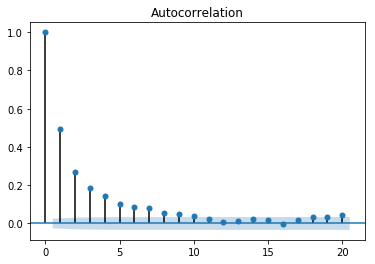

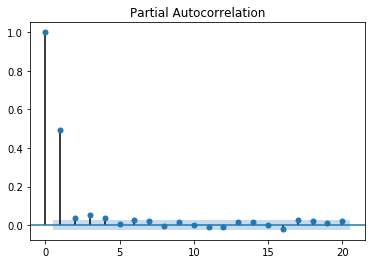

In [6]:
col = 'wind_max'
plot_acf(df[col], lags=20)
plot_pacf(df[col], lags=20)
pyplot.show()

**Feature-2**

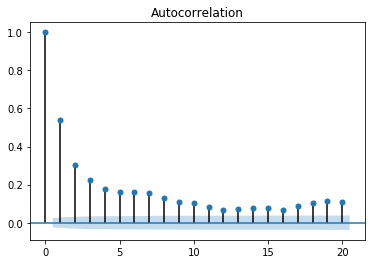

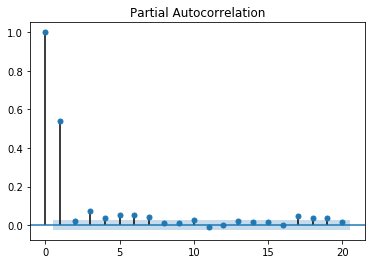

In [7]:
col = 'wind_ave'
plot_acf(df[col], lags=20)
plot_pacf(df[col], lags=20)
pyplot.show()

**Feature-3**

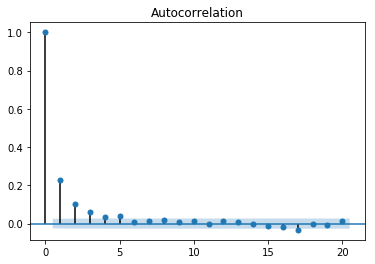

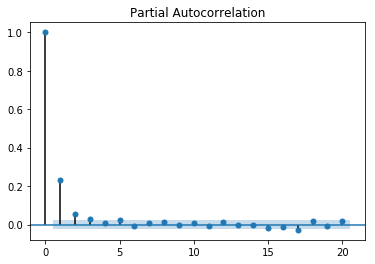

In [8]:
col = 'rainfall_height'
plot_acf(df[col], lags=20)
plot_pacf(df[col], lags=20)
pyplot.show()

**Feature-4**

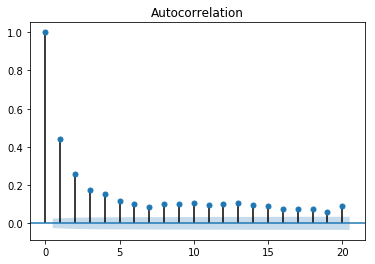

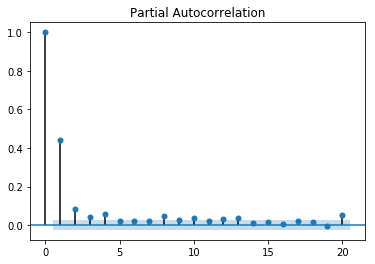

In [9]:
col = 'rainfall_form'
plot_acf(df[col], lags=20)
plot_pacf(df[col], lags=20)
pyplot.show()

**Feature-5**

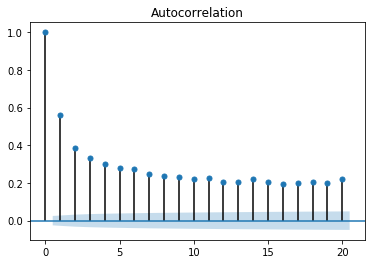

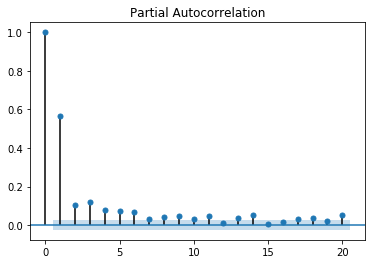

In [10]:
col = 'sunny_hours'
plot_acf(df[col], lags=20)
plot_pacf(df[col], lags=20)
pyplot.show()

**Feature-6**

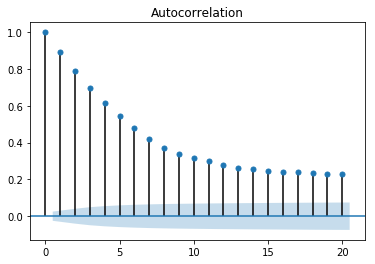

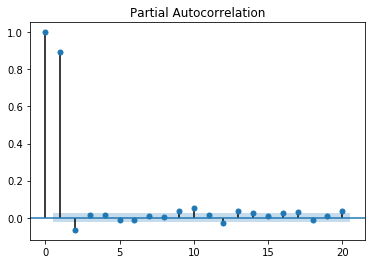

In [11]:
col = 'snow_height'
plot_acf(df[col], lags=20)
plot_pacf(df[col], lags=20)
pyplot.show()

**Feature-7**

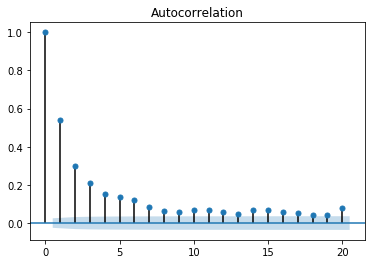

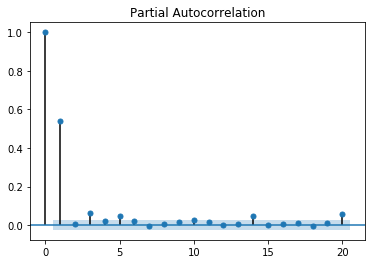

In [12]:
col = 'bedeckungsgrades'
plot_acf(df[col], lags=20)
plot_pacf(df[col], lags=20)
pyplot.show()

**Feature-8**

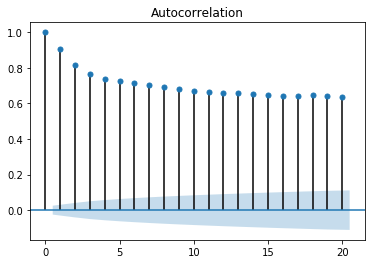

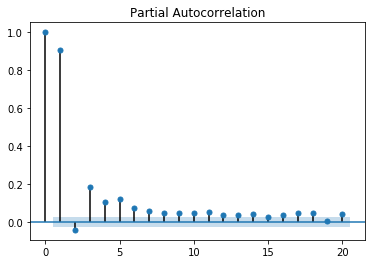

In [13]:
col = 'dampfdruckes'
plot_acf(df[col], lags=20)
plot_pacf(df[col], lags=20)
pyplot.show()

**Feature-9**

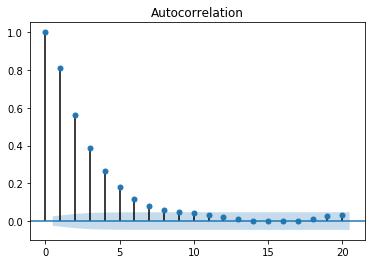

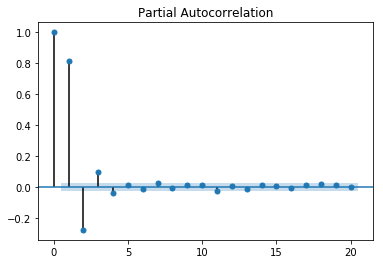

In [14]:
col = 'luftdruck'
plot_acf(df[col], lags=20)
plot_pacf(df[col], lags=20)
pyplot.show()

**Feature-10**

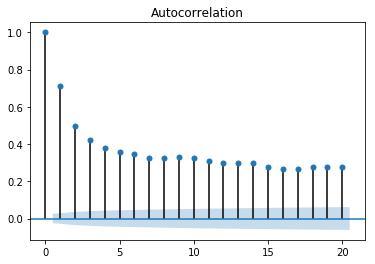

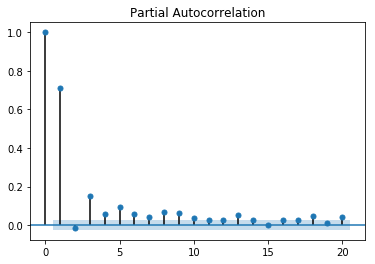

In [15]:
col = 'humidity'
plot_acf(df[col], lags=20)
plot_pacf(df[col], lags=20)
pyplot.show()

**Feature-11**

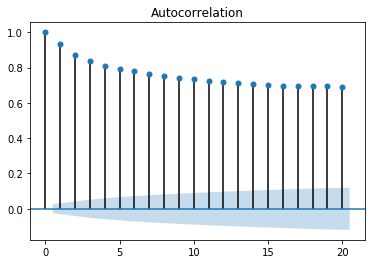

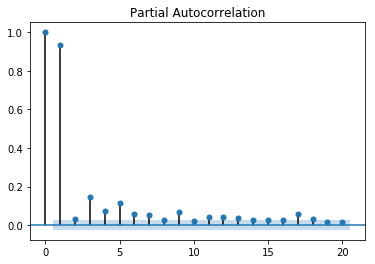

In [16]:
col = 'air_temp_max'
plot_acf(df[col], lags=20)
plot_pacf(df[col], lags=20)
pyplot.show()

**Feature-12**

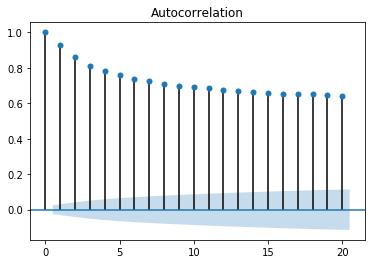

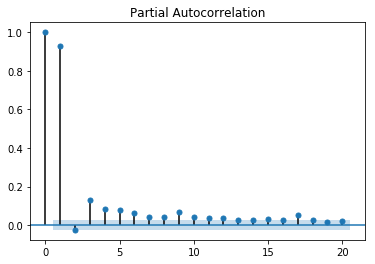

In [17]:
col = 'air_temp_min'
plot_acf(df[col], lags=20)
plot_pacf(df[col], lags=20)
pyplot.show()

**Feature-13**

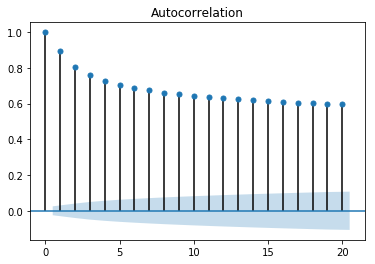

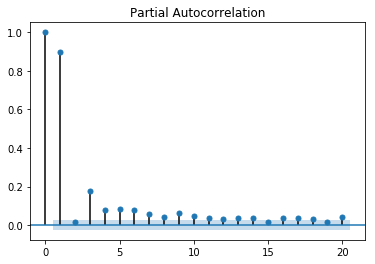

In [18]:
col = 'ground_temp_min'
plot_acf(df[col], lags=20)
plot_pacf(df[col], lags=20)
pyplot.show()

**Feature-14**

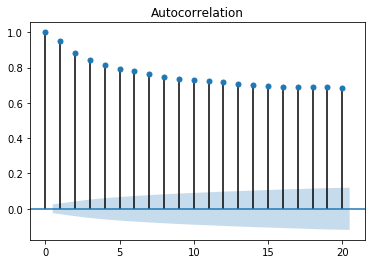

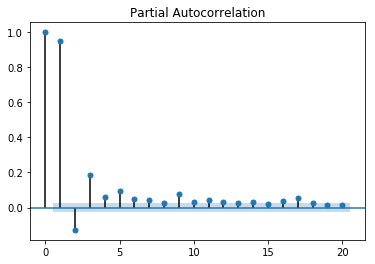

In [19]:
col = 'temp'
plot_acf(df[col], lags=20)
plot_pacf(df[col], lags=20)
pyplot.show()

**Feature-15**

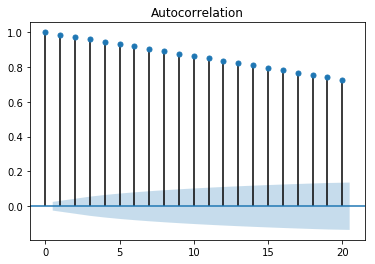

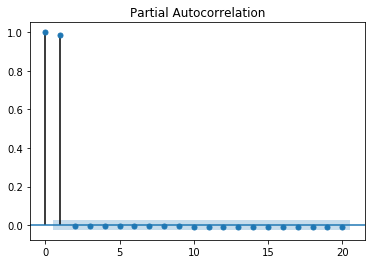

In [21]:
col = 'season'
plot_acf(df[col], lags=20)
plot_pacf(df[col], lags=20)
pyplot.show()

**Label**

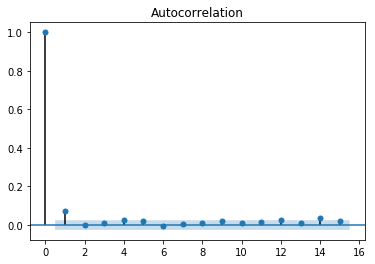

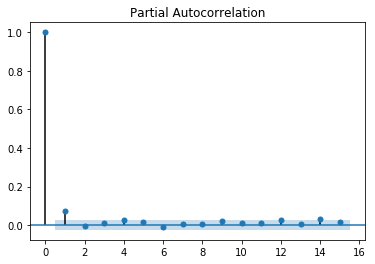

In [117]:
col = 'y'
plot_acf(df[col], lags=15)
plot_pacf(df[col], lags=15)
pyplot.show()

**Plot for Label between 2007 and 2008**

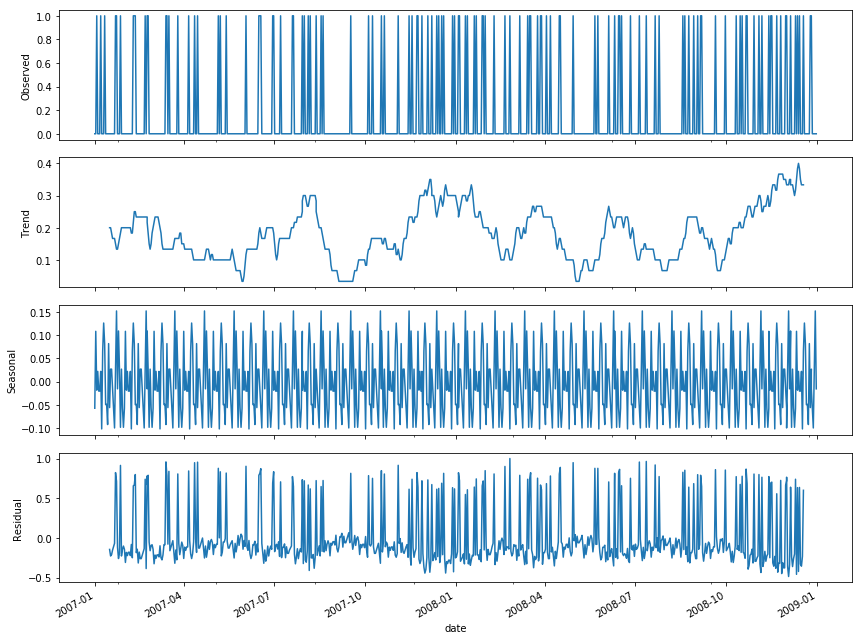

In [107]:
rcParams['figure.figsize'] = (12,9)
decomposition = sm.tsa.seasonal.seasonal_decompose(df['2007':'2008']['y'], freq=30)
fig = decomposition.plot()
plt.show()

**Plot for Label between 2006 and 2007**

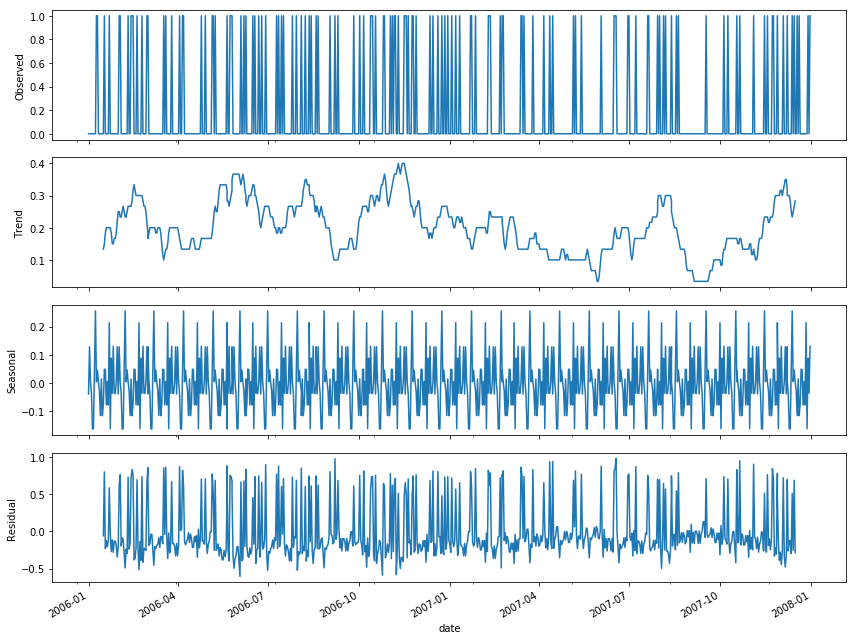

In [103]:
rcParams['figure.figsize'] = (12,9)
decomposition = sm.tsa.seasonal.seasonal_decompose(df['2006':'2007']['y'], freq=30)
fig = decomposition.plot()
plt.show()